<a href="https://colab.research.google.com/github/jorguzb/DataScienceScript/blob/master/STAT_NON_PARA_Kernel_Dauphine_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from math import *
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
# Deux fonctions (au moins) permettent de faire de l'estimation à noyau sous Python
# La première KDEUnivarite
from statsmodels.nonparametric.kde import KDEUnivariate 
# La seconde KernelDensity
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
# Dans la suite on regarde ces deux fonctions.

On commence par regarder la première méthode KDEUnivariate. La fonction suivante renvoie pour un choix de $h$ l'estimateur par noyau de $f$ évalué sur un échantillon $X=(X_1,\ldots,X_n)$ aux points d'une grille choisie à l'avance.

In [ ]:
def f_hat(grid , X, h, **kwargs):
    """Univariate Kernel Density Estimation with Statsmodels""" 
    # grid: grille de points où l'estimateur de $f$ sera évalué
    # X: échantillon (X_1,..., X_n)
    # h: choix de la taille de la fenêtre
    # **kwargs: arguments optionels Par défaut le noyau gaussien est utilisé
    kde = KDEUnivariate(X)
    kde.fit(bw = h, **kwargs)
    return kde.evaluate(grid)

Influence du **choix** de $h$:
- Lorsque $h$ est trop petit l'estimateur présente une forte variabilité mais un biais faible.
- Lorsqu'il est trop grand, l'estimateur est très lisse (faible variance), mais est très loin de la vraie densité (biais fort). 
Ceci coincide avec les résultats théoriques que nous avons observé.

Text(0.5, 0, 'X')

Text(0, 0.5, 'fonction densité')

Text(0.5, 1.0, 'Représentation de la densité')

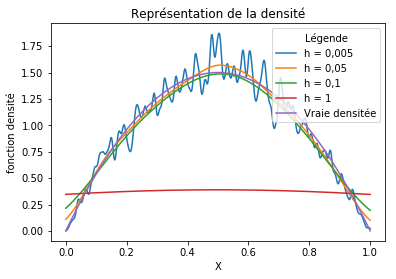

In [ ]:
n = 5000
grid = np.linspace(0,1,500)
X = st.beta.rvs(2,2, size = n)
true_f =st.beta.pdf(grid,2,2)

g1, = plt.plot(grid, f_hat(grid, X,0.005))
g2, = plt.plot(grid, f_hat(grid, X,0.05))
g3, = plt.plot(grid, f_hat(grid, X,0.1))
g4, = plt.plot(grid, f_hat(grid, X,1))
g5, = plt.plot(grid, true_f)

plt.legend([g1, g2, g3, g4, g5], ['h = 0,005', 'h = 0,05', 'h = 0,1', 'h = 1', 'Vraie densitée'],
              loc = 'upper right' , title = 'Légende')
plt.xlabel('X')
plt.ylabel('fonction densité')
plt.title('Représentation de la densité')

0.18205642030260802

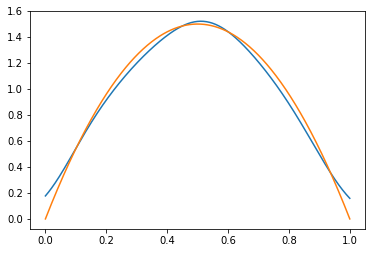

In [ ]:
plt.plot(grid, f_hat(grid, X, 0.08))
plt.plot(grid, true_f)
n**(-1/5)

Le choix de $h$ dépend de la taille de l'échantillon.
Un choix de $h$ pertinent pour un certain $n$ ne le sera pas forcément lorsque $n$ augmente.

Text(0.5, 0, 'X')

Text(0, 0.5, 'fonction densité')

Text(0.5, 1.0, 'Représentation de la densité de')

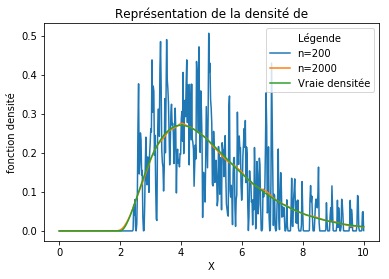

In [ ]:
n = 500
grid = np.linspace(0,10,500)

X = st.gamma.rvs(3,2, size = n)
XX = st.gamma.rvs(3,2, size = n*100)
true_f =st.gamma.pdf(grid,3,2)

g1, = plt.plot(grid, f_hat(grid, X, 0.01))
g2, = plt.plot(grid, f_hat(grid, XX,0.1))
g3, = plt.plot(grid, true_f)

plt.legend([g1, g2, g3], ['n=200', 'n=2000',  'Vraie densitée'],
              loc = 'upper right' , title = 'Légende')
plt.xlabel('X')
plt.ylabel('fonction densité')
plt.title('Représentation de la densité de')

**Influence du choix du noyau?**
Pour étudier ce cas on va passer sur la seconde fonction KernelDensity. 
*Attention*: Cette fonction a une extension .fit qui permet d'évaluer l'estimateur sur les données (comme la fonction précédente) et une fonction, analogue de la fonction KDEUnivariate.evaluate qui permet d'évaluer le modèle sur une grille de points choisis à l'avance.
Cette fonction est KernelDensity.score_samples: seulement il faut faire attention: elle renvoie la $\log($ densité) et non la densité. Il faut donc penser à repasser à l'exponentielle.

On commence par un exemple simple d'utilisation de cette fonction.

In [ ]:
# Attention dans cette méthode il faut travailler avec des vecteurs. 
# C'est pourquoi dans la suite on fera la modification .reshape(-1,1) des données, de la grille... 
# Comme illustré sur le code suivant.
grid = np.linspace(0,10,500)
np.shape(grid)
grid = np.linspace(0,10,500).reshape(-1,1)
np.shape(grid)

(500,)

(500, 1)

Text(0.5, 0, 'X')

Text(0, 0.5, 'fonction densité')

Text(0.5, 1.0, 'Représentation de la densité de')

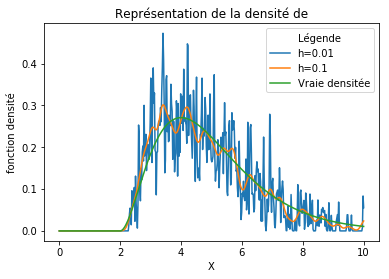

In [ ]:
n = 1000

grid = np.linspace(0,10,500).reshape(-1,1)
X = st.gamma.rvs(3,2, size = n).reshape(-1,1)
true_f =st.gamma.pdf(grid,3,2)



def f_hat2(grid, X, h, noyau):
    kde_model = KernelDensity(kernel=noyau, bandwidth=h)
    kde_model.fit(X)
    score = kde_model.score_samples(grid)
    #score = score[score != float('-inf')]# Le fait qu'on calcul des log-densité peut poser des problèmes de 0
    return np.exp(score).reshape(-1,1)

g1, = plt.plot(grid, f_hat2(grid, X, 0.01, 'gaussian'))
g2, = plt.plot(grid, f_hat2(grid, X,0.1, 'gaussian'))
g3, = plt.plot(grid, true_f)

plt.legend([g1, g2, g3], ['h=0.01', 'h=0.1',  'Vraie densitée'],
              loc = 'upper right' , title = 'Légende')
plt.xlabel('X')
plt.ylabel('fonction densité')
plt.title('Représentation de la densité de')

Tracer de plusieurs choix de $h$:

Text(0.5, 1.0, 'h=4')

Text(0.5, 1.0, 'h=4')

Text(0.5, 1.0, 'h=4')

Text(0.5, 1.0, 'h=4')

Text(0.5, 1.0, 'h=4')

Text(0.5, 1.0, 'h=4')

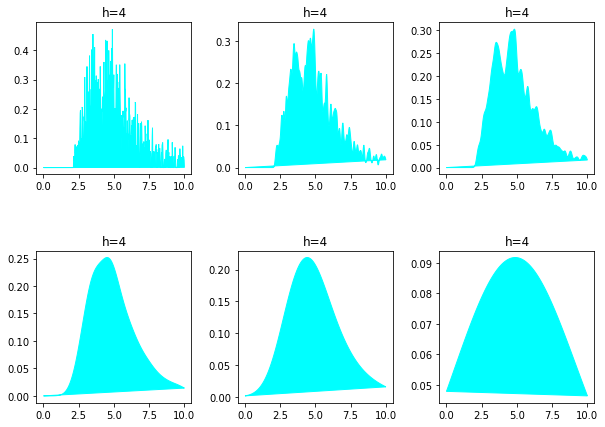

In [ ]:
n = 1000

grid = np.linspace(0,10,500).reshape(-1,1)
X = st.gamma.rvs(3,2, size = n).reshape(-1,1)
true_f =st.gamma.pdf(grid,3,2)

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10, 7))
plt_ind = np.arange(6) + 231

for h, ind in zip(bandwidths, plt_ind):
    plt.subplot(ind)
    plt.fill(grid, f_hat2(grid, X, h, 'gaussian'), c='cyan')
    plt.title("h="+str(b))

fig.subplots_adjust(hspace=0.5, wspace=.3)
plt.show()

Influence du choix du noyau $K$?
Dans la suite on trace les différents choix de $K$ disponibles dans le packages.

Text(0.5, 1.0, 'cosine')

Text(0.5, 1.0, 'epanechnikov')

Text(0.5, 1.0, 'exponential')

Text(0.5, 1.0, 'gaussian')

Text(0.5, 1.0, 'linear')

Text(0.5, 1.0, 'tophat')

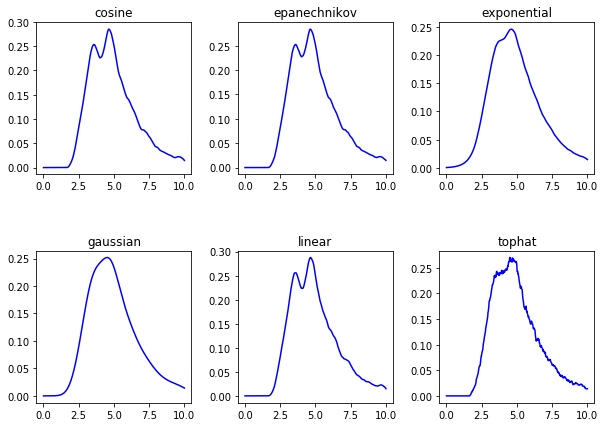

In [ ]:
kernels = ['cosine', 'epanechnikov', 'exponential', 'gaussian', 'linear', 'tophat']
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10, 7))
plt_ind = np.arange(6) + 231
h = 0.5
for k, ind in zip(kernels, plt_ind):
    plt.subplot(ind)
    plt.plot(grid, f_hat2(grid, X, h, k), c='blue')
    plt.title(k)

fig.subplots_adjust(hspace=0.5, wspace=.3)
plt.show()


On trace cette fois l'estimateur de $f$ pour un même $h$ et un même jeu de données, en faisant varier le choix du noyau. On remarque qu'effectivement si les formes d'estimateurs varient, il n'est pas clair si un noyau semble plus adapté qu'un autre pour estimer cette densité $f$.